<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chapter-1---Motivating-Problems-and-Systems" data-toc-modified-id="Chapter-1---Motivating-Problems-and-Systems-1">Chapter 1 - Motivating Problems and Systems</a></span><ul class="toc-item"><li><span><a href="#1.2-Averaging-algorithms-in-wireless-sensor-networks" data-toc-modified-id="1.2-Averaging-algorithms-in-wireless-sensor-networks-1.1">1.2 Averaging algorithms in wireless sensor networks</a></span><ul class="toc-item"><li><span><a href="#Create-the-Graph-in-networkx-and-define-$A$" data-toc-modified-id="Create-the-Graph-in-networkx-and-define-$A$-1.1.1">Create the Graph in networkx and define $A$</a></span></li><li><span><a href="#Simulate-and-visualize-Process" data-toc-modified-id="Simulate-and-visualize-Process-1.1.2">Simulate and visualize Process</a></span></li><li><span><a href="#Interactive-network-presentation" data-toc-modified-id="Interactive-network-presentation-1.1.3">Interactive network presentation</a></span></li></ul></li><li><span><a href="#Exercise-1.4-Simulating-the-averaging-dynamics" data-toc-modified-id="Exercise-1.4-Simulating-the-averaging-dynamics-1.2">Exercise 1.4 Simulating the averaging dynamics</a></span></li><li><span><a href="#Exercise-1.5-(Section-1.6-ff.)-Bugs-Dynamic" data-toc-modified-id="Exercise-1.5-(Section-1.6-ff.)-Bugs-Dynamic-1.3">Exercise 1.5 (Section 1.6 ff.) Bugs Dynamic</a></span><ul class="toc-item"><li><span><a href="#Cyclic-Pursuit" data-toc-modified-id="Cyclic-Pursuit-1.3.1">Cyclic Pursuit</a></span></li><li><span><a href="#Cyclic-Balancing" data-toc-modified-id="Cyclic-Balancing-1.3.2">Cyclic Balancing</a></span></li></ul></li></ul></li></ul></div>

**TO-DO:**

- 1.3 continuous-time averaging system: Flocking Dynamics Example
- 1.4 Discrete and continuous time flowing system example

- robot dynamics in E1.6 --> Take a look at what Allan did!


In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx

# Import self defined functions
import ch1_lib

# For interactive graphs
%matplotlib notebook
import ipywidgets as widgets

# Settings
custom_figsize = (6, 4)  # Might need to change this value to fit the figures to your screen

# Chapter 1 - Motivating Problems and Systems
These Jupyter Notebook scripts contain some examples, visualization and supplements accompanying the book "Lectures on Network Systems" by Francesco Bullo http://motion.me.ucsb.edu/book-lns/. These scripts are published with the MIT license. **Make sure to run the first cell above to import all necessary packages and functions and adapt settings in case.** After that, you can jump to each example and follow the description there to execute cell by cell. Most of the functions are kept in a separate file to keep this script neat. 

## 1.2 Averaging algorithms in wireless sensor networks

This example is based on first work of Sean Jaffe. It contains the example from Chapter 1.2 for discrete averaging network dynamics with wireless sensor network, enhanced examples and discussion will occur in Chapter 5, this is an introductory visulization. 


### Create the Graph in networkx and define $A$

Execute next cell to create the example graph and define the matrix $A_{wsn}$.

Note: In Chapter 5 we will introduce an elegant algorithm do define the weights as in this example, the equal-neighbour-model.

In [ ]:
# Creating the Network System example as in Chapter 1.2
G = nx.DiGraph()
G.add_edges_from([(1,2), (2,1), (2,3), (3,2), (3,4), (4,3), (2,4), (4,2)])

# Define position of nodes in graph plot
pos = {1:[0.2,0.2],2:[.4,.2],3:[.4,.6],4:[.7,.6]}

# Define the adjacency matrix A
A = np.array([[0.5,0.5, 0., 0.],
              [1/4, 1/4, 1/4, 1/4],
              [0., 1/3, 1/3, 1/3],
              [0., 1/3, 1/3, 1/3]
])

fig, ax1 = plt.subplots(figsize = custom_figsize)  # Init figure
nx.draw_networkx(G, pos, node_size=200, ax = ax1)  # Draw network
ax1.margins(0.05) # Zooming out for better visualization

print("A matrix: \n", A)

### Simulate and visualize Process
Choose the initial state vector x (randomized or chosen) and the number to time steps to simulate.

We plot our simulation with the initial average as dashed-line to show, that we do not reach average-consensus (more on that in Chapter 5)

Note: Discrete-time linear system $x(k+1) = A x(k)$, $x(0)=x_0$ or, equivalently $x(k) = A^k x_0$

In [ ]:
# Initialize random state vector or define your own one
x_0 = np.random.rand(4)
#x_0 = np.array([0.2, 0.4, 0.6, 0.8])
# Choosing the range of time step
t = 15

# Initialize figure
fig, ax2 = plt.subplots(figsize=custom_figsize)

states = ch1_lib.simulate_network(A,x_0, t)  # Simulate network and save states for each time step in a t*n np.array
ch1_lib.plot_node_val_2D(states, x_0, t, ax2)  # Visualize states in a 2D Graph

### Interactive network presentation
Below you can find an interactive network simulation and different visualization, where you can use the slide bar to visualize all values at each node for each time step.

*Note: Executing this cell twice can lead to an error depending on your system, restart Kernel if necessary*

In [ ]:
fig, ax3 = plt.subplots(figsize=custom_figsize)
fig, v_bound, pos = ch1_lib.init_network_sim_plot(G, states, fig, pos=pos)

def inter(timestep):
    ch1_lib.update_network(timestep['new'], G=G, states_m=states, ax=ax3, vbound=v_bound, pos=pos)
    #ax3.margins(0.20) # Zooming out for better visualization
    return None

# Plot initial configuration
ch1_lib.update_network(0, G=G, states_m=states, ax=ax3, vbound=v_bound, pos=pos)
# Call widgets
ch1_lib.create_widgets_play_slider(fnc=inter, minv=1, maxv=t-1, step=1, play_speed=1000)

## Exercise 1.4 Simulating the averaging dynamics

In this chapter the results for exercise 1.4 are presented for comparison and discussing the averaging dynamics of these different systems.

In [ ]:
# Define x_0
xinitial = np.array([-2., -1., 0., +1., +2.])

# Defining the 3 different systems.
# Complete graph
Acomplete = np.ones((5,5)) / 5

# Cycle graph
Acycle = np.array([
    [1/3, 1/3, 0, 0, 1/3],
    [1/3, 1/3, 1/3, 0, 0],
    [0, 1/3, 1/3, 1/3, 0],
    [0, 0, 1/3, 1/3, 1/3],
    [1/3, 0, 0, 1/3,  1/3] ]  )

# Star topology. center = node 1
Astar = np.array([
    [1/5, 1/5, 1/5, 1/5, 1/5],
    [1/2, 1/2, 0, 0, 0], 
    [1/2, 0, 1/2, 0, 0],
    [1/2, 0, 0, 1/2, 0],
    [1/2, 0, 0, 0, 1/2]   ])

# Defining simulation time
ts = 10

**Complete Graph Simulation**

In [ ]:
# Initialize figure
fig, ax141 = plt.subplots(figsize=custom_figsize)

states_complete = ch1_lib.simulate_network(Acomplete,xinitial, ts)  # Simulate network and save states for each time step in a t*n np.array
ch1_lib.plot_node_val_2D(states_complete, xinitial, ts, ax141)  # Visualize states in a 2D Graph

**Star Graph Simulation**

In [ ]:
# Initialize figure
fig, ax142 = plt.subplots(figsize=custom_figsize)

states_cycle = ch1_lib.simulate_network(Acycle,xinitial, ts)  # Simulate network and save states for each time step in a t*n np.array
ch1_lib.plot_node_val_2D(states_cycle, xinitial, ts, ax142)  # Visualize states in a 2D Graph

In [ ]:
# Initialize figure
fig, ax143 = plt.subplots(figsize=custom_figsize)

states_star = ch1_lib.simulate_network(Astar,xinitial, ts)  # Simulate network and save states for each time step in a t*n np.array
ch1_lib.plot_node_val_2D(states_star, xinitial, ts, ax143)  # Visualize states in a 2D Graph

In [ ]:
# Verfying the results
eigval, eigvec = np.linalg.eig( Astar.transpose() )
dom_eigvec = eigvec[0:5,1]/eigvec[0:5,1].sum()
print("Dominant eigenvector: ", dom_eigvec)
print("Final values :", xinitial@dom_eigvec*np.ones(5))

## Exercise 1.5 (Section 1.6 ff.) Bugs Dynamic
In this example the bugs dynamics as in exercise 1.5 are visualized for the cyclic pursuit or the cyclic balancing case.
### Cyclic Pursuit
Initialize and simulate the bugs results.

In [6]:
radius = 1.0  # Circle radius
n_bugs = 6  # Number of bugs
n_steps = 50  # Number of simulation steps (states)
gain = 0.1  # Gain kappa

# Initialize the bugs
bugs_init, states_bugs_init = ch1_lib.init_bugs(radius, n_bugs, n_steps)
# Simulate the bugs
states_bugs = ch1_lib.simulate_bugs_cyclic_pursuit(radius, n_bugs, n_steps, gain, bugs_init, states_bugs_init)

Below you find an interactive visulization of the bugs dynamics for cyclic pursuit.

<IPython.core.display.Javascript object>


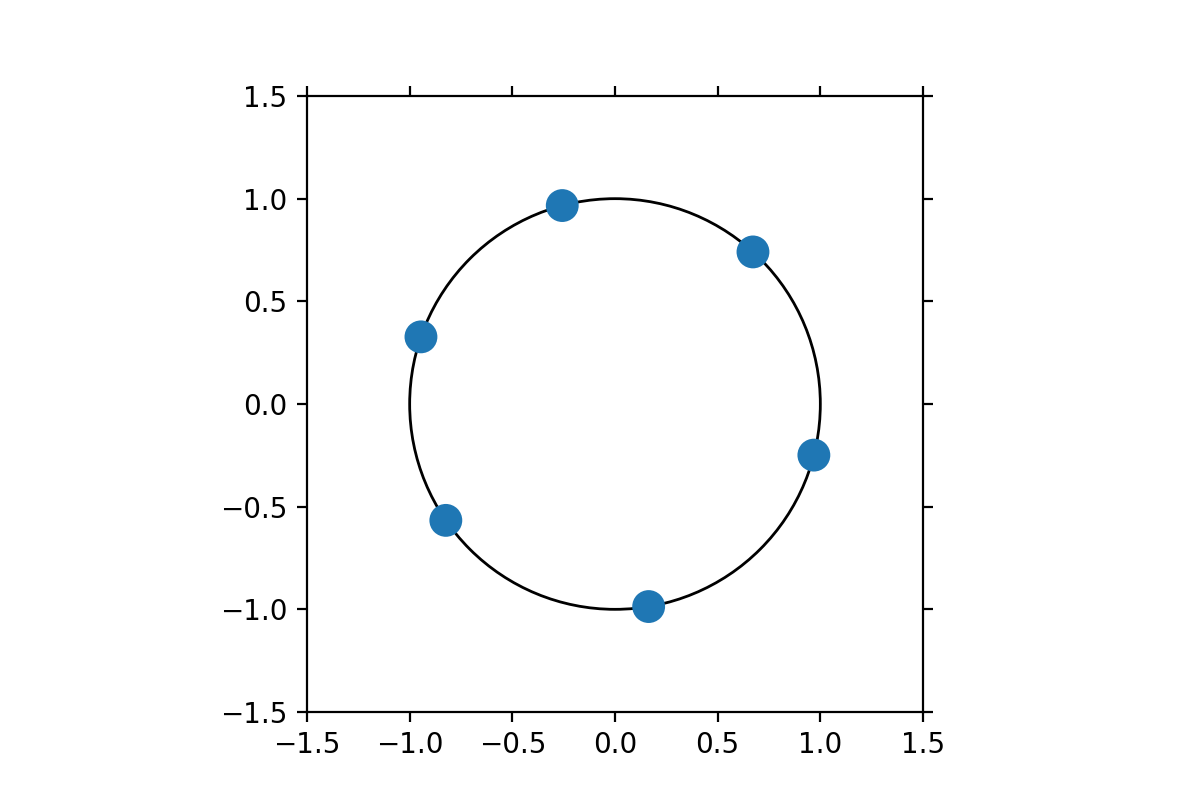

In [7]:
fig, ax151 = plt.subplots(figsize=custom_figsize)

def interactive_bugs(timestep):
    ax151.clear()
    ch1_lib.plot_circle_and_bugs(ax151, radius, states_bugs[timestep['new']])  # Take the new value received from the slider dict
    return None

# Plot initial configuration
ch1_lib.plot_circle_and_bugs(ax151, radius, states_bugs[0])
# Execute widgets
ch1_lib.create_widgets_play_slider(fnc=interactive_bugs, minv=0, maxv=n_steps-1, step=1, play_speed=500)

### Cyclic Balancing

Using some of the previous defined values, showing cycling balancing dynamics.

<IPython.core.display.Javascript object>


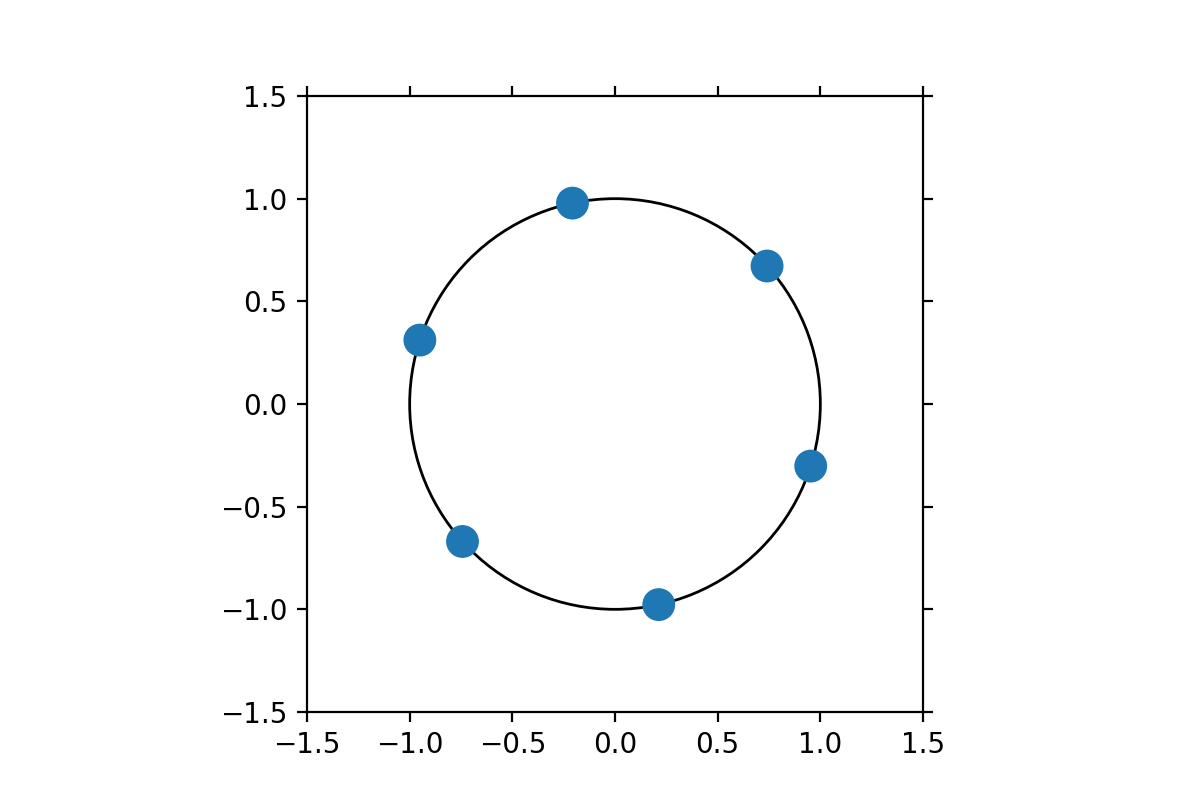

In [10]:
# Initialize the bugs
bugs_init2, states_bugs_init2 = ch1_lib.init_bugs(radius, n_bugs, n_steps)
# Simulate the bugs
states_bugs2 = ch1_lib.simulate_bugs_cyclic_balancing(radius, n_bugs, n_steps, gain, bugs_init2, states_bugs_init2)

fig, ax152 = plt.subplots(figsize=custom_figsize)

def interactive_bugs2(timestep):
    ax152.clear()
    ch1_lib.plot_circle_and_bugs(ax152, radius, states_bugs2[timestep['new']])  # Take the new value received from the slider dict
    return None

# Plot initial configuration
ch1_lib.plot_circle_and_bugs(ax152, radius, states_bugs2[0])
# Execute widgets
ch1_lib.create_widgets_play_slider(fnc=interactive_bugs2, minv=0, maxv=n_steps-1, step=1, play_speed=500)

In [ ]:
states_bugs2